In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams['figure.figsize']=(10,6)

In [2]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [3]:
train=pd.read_csv('data/house_price_train.csv')
test=pd.read_csv('data/house_price_test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [14]:
train.iloc[:,0:80].columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
all_data1=pd.concat((train.iloc[:,1:80], test.iloc[:,1:80]))
all_data1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [17]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [18]:
prices=pd.DataFrame({'price':train.SalePrice, 'log(price+1)': np.log1p(train.SalePrice)})
prices.head()

,log(price+1),price
0,12.247699,208500
1,12.109016,181500
2,12.317171,223500
3,11.849405,140000
4,12.429220,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009155668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000930FF60>]], dtype=object)

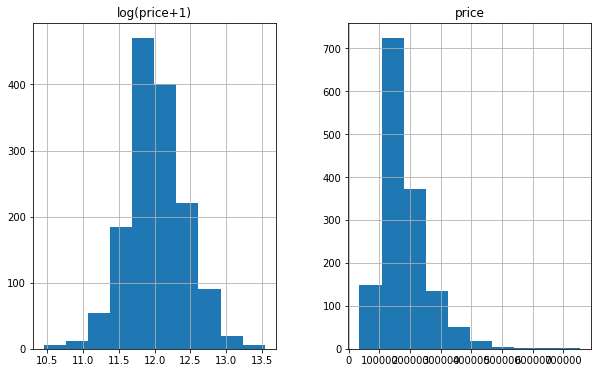

In [19]:
prices.hist()

In [20]:
train.SalePrice=np.log1p(train.SalePrice)

In [21]:
all_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [8]:
tp=all_data.dtypes[all_data.dtypes!='object']
tp.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [9]:
numeric_features=all_data.dtypes[all_data.dtypes!='object'].index

In [10]:
print(skew(train.iloc[:,1]))
skew(train.iloc[:,1].dropna())

1.4062101115313512


1.4062101115313512

In [11]:
train[numeric_features].skew()

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
dtype: float64

In [12]:
skewed_features=train[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features=skewed_features[skewed_features>0.75].index

In [13]:
all_data[skewed_features]=np.log1p(all_data[skewed_features])

In [14]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


In [22]:
all_data=pd.get_dummies(all_data)

In [23]:
all_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=288)

In [24]:
tt=pd.DataFrame()
tt['c1']=np.arange(6)
tt['c2']=['a','b','a','c','b','c']
tt['c3']=np.arange(5,11)
tt['c4']=['f','m','f','f','f','m']
pd.get_dummies(tt)

,c1,c3,c2_a,c2_b,c2_c,c4_f,c4_m
0,0,5,1,0,0,1,0
1,1,6,0,1,0,0,1
2,2,7,1,0,0,1,0
3,3,8,0,0,1,1,0
4,4,9,0,1,0,1,0
5,5,10,0,0,1,0,1


In [25]:
all_data.isnull().sum()

MSSubClass                 0
LotFrontage              486
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                23
BsmtFinSF1                 1
BsmtFinSF2                 1
BsmtUnfSF                  1
TotalBsmtSF                1
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               2
BsmtHalfBath               2
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt              159
GarageCars                 1
GarageArea                 1
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
                        ... 
GarageCond_TA              0
PavedDrive_N               0
PavedDrive_P               0
PavedDrive_Y  

In [27]:
all_data.LotFrontage.fillna(all_data.LotFrontage.mean())

0        65.000000
1        80.000000
2        68.000000
3        60.000000
4        84.000000
5        85.000000
6        75.000000
7        69.305795
8        51.000000
9        50.000000
10       70.000000
11       85.000000
12       69.305795
13       91.000000
14       69.305795
15       51.000000
16       69.305795
17       72.000000
18       66.000000
19       70.000000
20      101.000000
21       57.000000
22       75.000000
23       44.000000
24       69.305795
25      110.000000
26       60.000000
27       98.000000
28       47.000000
29       60.000000
           ...    
1429     50.000000
1430     75.000000
1431     69.000000
1432     50.000000
1433     60.000000
1434     41.000000
1435     44.000000
1436     69.000000
1437     65.000000
1438     70.000000
1439    140.000000
1440     69.305795
1441     69.305795
1442     95.000000
1443     88.000000
1444    125.000000
1445     78.000000
1446     41.000000
1447     58.000000
1448     69.305795
1449     21.000000
1450     21.

In [30]:
all_data.mean()

MSSubClass                  57.137718
LotFrontage                 69.305795
LotArea                  10168.114080
OverallQual                  6.089072
OverallCond                  5.564577
YearBuilt                 1971.312778
YearRemodAdd              1984.264474
MasVnrArea                 102.201312
BsmtFinSF1                 441.423235
BsmtFinSF2                  49.582248
BsmtUnfSF                  560.772104
TotalBsmtSF               1051.777587
1stFlrSF                  1159.581706
2ndFlrSF                   336.483727
LowQualFinSF                 4.694416
GrLivArea                 1500.759849
BsmtFullBath                 0.429894
BsmtHalfBath                 0.061364
FullBath                     1.568003
HalfBath                     0.380267
BedroomAbvGr                 2.860226
KitchenAbvGr                 1.044536
TotRmsAbvGrd                 6.451524
Fireplaces                   0.597122
GarageYrBlt               1978.113406
GarageCars                   1.766621
GarageArea  

In [31]:
all_data=all_data.fillna(all_data.mean())

In [32]:
X_train=all_data[:train.shape[0]]
X_test=all_data[train.shape[0]:]
y=train.SalePrice

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [37]:
score=cross_val_score(Ridge(0.05), X_train, y, cv=5, scoring='neg_mean_squared_error')
score

array([-0.01807707, -0.02693221, -0.02677537, -0.01245608, -0.03940143])

In [39]:
np.sqrt(-score)

array([ 0.134451  ,  0.16411036,  0.16363182,  0.11160683,  0.19849794])

In [40]:
def rmse_cv(model):
    return np.sqrt(-cross_val_score(model, X_train, y, cv=5, scoring='neg_mean_squared_error'))

In [41]:
rmse_cv(Ridge(0.05))

array([ 0.134451  ,  0.16411036,  0.16363182,  0.11160683,  0.19849794])

In [42]:
rmse_cv(Ridge(0.5)).mean()

0.1474146609502533

In [43]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ridge_cv=[rmse_cv(Ridge(a)).mean() for a in alphas]
ridge_cv

[0.15445959089228575,
 0.15287717526920841,
 0.14933512485733036,
 0.14482942756188194,
 0.14153292668942391,
 0.14054069106042472,
 0.13982664627139302,
 0.13976596285220727,
 0.14033189223830125,
 0.14134056893486974,
 0.14252272723082993]

In [44]:
type(ridge_cv)

list

In [46]:
cv_ridge=pd.Series(ridge_cv, index=alphas)
cv_ridge

0.05     0.154460
0.10     0.152877
0.30     0.149335
1.00     0.144829
3.00     0.141533
5.00     0.140541
10.00    0.139827
15.00    0.139766
30.00    0.140332
50.00    0.141341
75.00    0.142523
dtype: float64

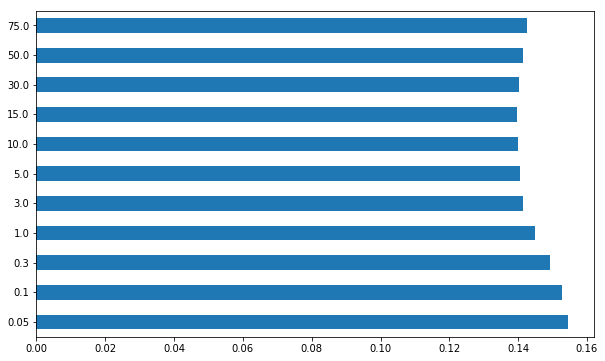

In [47]:
cv_ridge.plot(kind='barh')

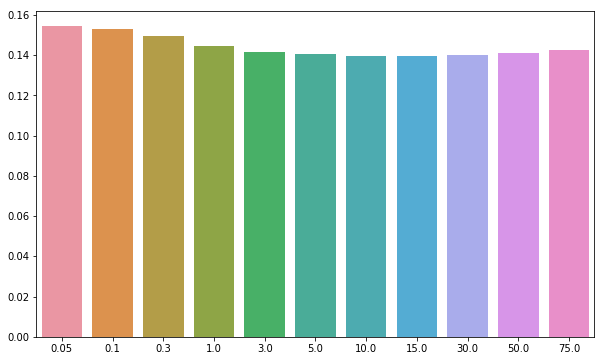

In [51]:
sns.barplot(x=cv_ridge.index, y=cv_ridge)

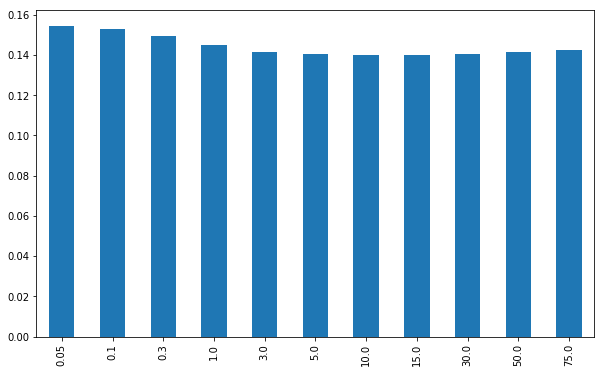

In [52]:
cv_ridge.plot.bar()

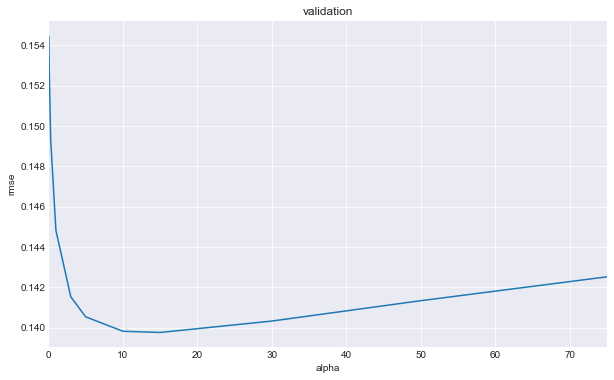

In [53]:
sns.set_style("darkgrid")
cv_ridge.plot.line()
plt.xlabel("alpha")
plt.ylabel('rmse')
plt.title("validation")

In [54]:
cv_ridge.min()

0.13976596285220727

In [55]:
model_lasso=LassoCV(alphas=[1,0.1,0.01,0.005]).fit(X_train, y)
model_lasso

LassoCV(alphas=[1, 0.1, 0.01, 0.005], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [56]:
model_lasso.alpha_

0.0050000000000000001